In [1]:
import pandas as pd
import datetime
import calendar
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import numpy as np

In [2]:
features_df = pd.read_csv("features.csv")
stores_df = pd.read_csv("stores.csv")
train_df = pd.read_csv("train.csv")

In [3]:
seasons_dict = {
    1:"Winter",
    2:"Winter",
    3:"Spring",
    4:"Spring",
    5:"Spring",
    6:"Summer",
    7:"Summer",
    8:"Summer",
    9:"Fall",
    10:"Fall",
    11:"Fall",
    12:"Winter"
}

In [4]:
master_df = train_df.merge(stores_df, on='Store', how='left')
master_df = master_df.merge(features_df, on=['Store', 'Date'], how='left')

In [5]:
master_df['MarkDown1'] = master_df['MarkDown1'].fillna(0)
master_df['MarkDown2'] = master_df['MarkDown2'].fillna(0)
master_df['MarkDown3'] = master_df['MarkDown3'].fillna(0)
master_df['MarkDown4'] = master_df['MarkDown4'].fillna(0)
master_df['MarkDown5'] = master_df['MarkDown5'].fillna(0)
master_df['isHoliday'] = master_df['IsHoliday_x']
master_df = master_df.drop(columns=['IsHoliday_x', 'IsHoliday_y'])
master_df['Date'] = pd.to_datetime(master_df['Date'], format='%Y-%m-%d')
master_df['Week_Number'] = master_df['Date'].dt.week
master_df['Quarter'] = master_df['Date'].dt.quarter
master_df['Month'] = master_df['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])
master_df['Season'] = (master_df['Date'].apply(lambda dt: (dt.month%12 + 3)//3)).map(seasons_dict)

In [6]:
master_df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,isHoliday,Week_Number,Quarter,Month,Season
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,1,Feb,Winter
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,6,1,Feb,Winter
2,1,1,2010-02-19,41595.55,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,7,1,Feb,Winter
3,1,1,2010-02-26,19403.54,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,8,1,Feb,Winter
4,1,1,2010-03-05,21827.90,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,9,1,Mar,Winter


In [7]:
master_df = master_df.join(pd.get_dummies(master_df['Quarter'], prefix='Quarter'))

In [8]:
master_df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,isHoliday,Week_Number,Quarter,Month,Season,Quarter_1,Quarter_2,Quarter_3,Quarter_4
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,5,1,Feb,Winter,1,0,0,0
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,0.0,0.0,...,8.106,True,6,1,Feb,Winter,1,0,0,0
2,1,1,2010-02-19,41595.55,A,151315,39.93,2.514,0.0,0.0,...,8.106,False,7,1,Feb,Winter,1,0,0,0
3,1,1,2010-02-26,19403.54,A,151315,46.63,2.561,0.0,0.0,...,8.106,False,8,1,Feb,Winter,1,0,0,0
4,1,1,2010-03-05,21827.90,A,151315,46.50,2.625,0.0,0.0,...,8.106,False,9,1,Mar,Winter,1,0,0,0


In [9]:
result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 2)]).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.315
Date:                Wed, 18 Jul 2018   Prob (F-statistic):            0.00786
Time:                        15:47:49   Log-Likelihood:            -1.2106e+05
No. Observations:               10238   AIC:                         2.421e+05
Df Residuals:                   10226   BIC:                         2.422e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.084e-06   2.95e-0

In [17]:
master_df.describe()

master_df.to_csv("master.csv")

In [11]:
result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 1)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 2)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 3)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 4)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 5)]).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.290
Date:                Wed, 18 Jul 2018   Prob (F-statistic):              0.223
Time:                        15:47:50   Log-Likelihood:            -1.1933e+05
No. Observations:               10244   AIC:                         2.387e+05
Df Residuals:                   10232   BIC:                         2.388e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.766e-07    2.2e-0

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.493
Date:                Wed, 18 Jul 2018   Prob (F-statistic):              0.126
Time:                        15:47:50   Log-Likelihood:                -93713.
No. Observations:                8999   AIC:                         1.874e+05
Df Residuals:                    8987   BIC:                         1.875e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6.904e-06   1.94e-0

In [12]:
master_df[(master_df['Store'] == 1) & (master_df['Quarter'] == 1)].describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week_Number,Quarter,Quarter_1,Quarter_2,Quarter_3,Quarter_4
count,2376.0,2376.000000,2376.000000,2376.0,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.0,2376.0,2376.0,2376.0,2376.0
mean,1.0,44.225589,21502.405274,151315.0,52.258258,3.157235,3966.692420,1961.729949,17.343779,2544.977243,1900.700013,215.531776,7.676141,7.185185,1.0,1.0,0.0,0.0,0.0
std,0.0,29.741929,27384.514596,0.0,9.174786,0.388876,7067.545476,4495.325962,39.701227,7051.589770,2788.900007,4.143648,0.298330,3.417264,0.0,0.0,0.0,0.0,0.0
min,1.0,1.000000,-863.000000,151315.0,35.400000,2.514000,0.000000,0.000000,0.000000,0.000000,0.000000,211.018042,7.348000,1.000000,1.0,1.0,0.0,0.0,0.0
25%,1.0,19.750000,3447.550000,151315.0,45.320000,2.976000,0.000000,0.000000,0.000000,0.000000,0.000000,211.404742,7.348000,5.000000,1.0,1.0,0.0,0.0,0.0
50%,1.0,37.500000,10889.605000,151315.0,53.560000,3.157000,0.000000,0.000000,0.000000,0.000000,0.000000,213.823333,7.742000,7.000000,1.0,1.0,0.0,0.0,0.0
75%,1.0,72.000000,30289.552500,151315.0,58.760000,3.473000,6118.560000,1082.740000,9.800000,671.430000,3402.660000,220.172015,7.742000,10.000000,1.0,1.0,0.0,0.0,0.0
max,1.0,99.000000,158241.980000,151315.0,69.970000,3.845000,34577.060000,21813.160000,160.530000,32403.870000,8483.000000,221.361012,8.106000,13.000000,1.0,1.0,0.0,0.0,0.0


In [13]:
week_array = []
store_array = []

for i in range(1, 46):
    store_array.append(i)
total_stores_sales = {}

for i in range(1, 46):
    week_array.append(i)
    current_store_array = []
    for j in range(1, 53):
        current_dp = master_df[(master_df['Store'] == i) & (master_df['Week_Number'] == j)]
        sales_array = current_dp['Weekly_Sales'].tolist()
        sum_sales = 0
        for k in range(1, len(sales_array)):
            sum_sales = sum_sales + sales_array[k]
        current_store_array.append(sum_sales)
    total_stores_sales[i] = current_store_array

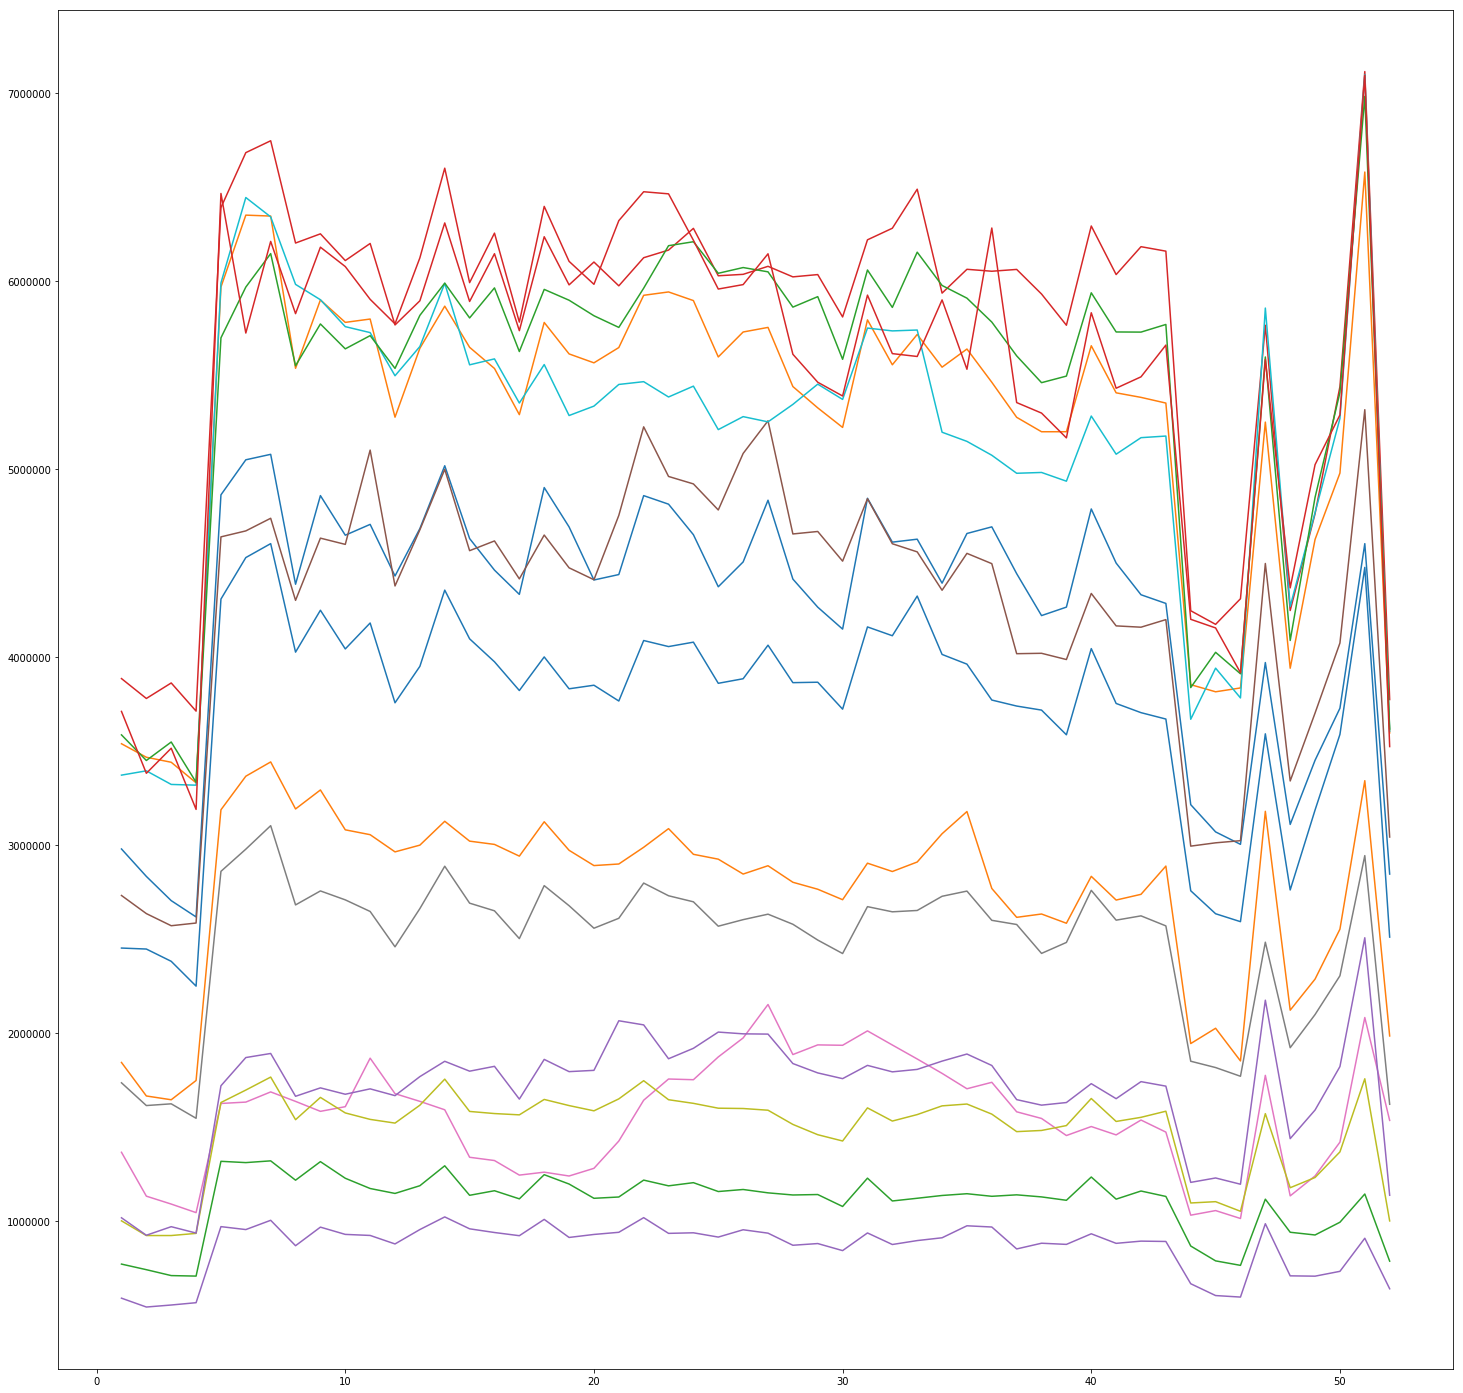

In [15]:
store_array = []
for i in range(1, 53):
    store_array.append(i)

#for i in range(1, 46):
    #total_stores_sales[i].pop(0)
    
plt.plot(store_array,total_stores_sales[1])
plt.plot(store_array,total_stores_sales[2])
plt.plot(store_array,total_stores_sales[3])
plt.plot(store_array,total_stores_sales[4])
plt.plot(store_array,total_stores_sales[5])
plt.plot(store_array,total_stores_sales[6])
plt.plot(store_array,total_stores_sales[7])
plt.plot(store_array,total_stores_sales[8])
plt.plot(store_array,total_stores_sales[9])
plt.plot(store_array,total_stores_sales[10])
plt.plot(store_array,total_stores_sales[11])
plt.plot(store_array,total_stores_sales[12])
plt.plot(store_array,total_stores_sales[13])
plt.plot(store_array,total_stores_sales[14])
plt.plot(store_array,total_stores_sales[15])

fig = plt.gcf()
fig.set_size_inches(25,25)
plt.show()

In [16]:
print(total_stores_sales[2][1])

3466759.32
